<a href="https://colab.research.google.com/github/nikku1234/Tensorflow_examples/blob/master/Graduate_admission_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
files.upload()

Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1.csv


{'Admission_Predict_Ver1.1.csv': b'Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR ,CGPA,Research,Chance of Admit \r\n1,337,118,4,4.5,4.5,9.65,1,0.92\r\n2,324,107,4,4,4.5,8.87,1,0.76\r\n3,316,104,3,3,3.5,8,1,0.72\r\n4,322,110,3,3.5,2.5,8.67,1,0.8\r\n5,314,103,2,2,3,8.21,0,0.65\r\n6,330,115,5,4.5,3,9.34,1,0.9\r\n7,321,109,3,3,4,8.2,1,0.75\r\n8,308,101,2,3,4,7.9,0,0.68\r\n9,302,102,1,2,1.5,8,0,0.5\r\n10,323,108,3,3.5,3,8.6,0,0.45\r\n11,325,106,3,3.5,4,8.4,1,0.52\r\n12,327,111,4,4,4.5,9,1,0.84\r\n13,328,112,4,4,4.5,9.1,1,0.78\r\n14,307,109,3,4,3,8,1,0.62\r\n15,311,104,3,3.5,2,8.2,1,0.61\r\n16,314,105,3,3.5,2.5,8.3,0,0.54\r\n17,317,107,3,4,3,8.7,0,0.66\r\n18,319,106,3,4,3,8,1,0.65\r\n19,318,110,3,4,3,8.8,0,0.63\r\n20,303,102,3,3.5,3,8.5,0,0.62\r\n21,312,107,3,3,2,7.9,1,0.64\r\n22,325,114,4,3,2,8.4,0,0.7\r\n23,328,116,5,5,5,9.5,1,0.94\r\n24,334,119,5,5,4.5,9.7,1,0.95\r\n25,336,119,5,4,3.5,9.8,1,0.97\r\n26,340,120,5,4.5,4.5,9.6,1,0.94\r\n27,322,109,5,4.5,3.5,8.8,0,0.76\r\n28,298,9

In [7]:
ls

Admission_Predict_Ver1.1.csv  sample_data/


In [3]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 115kB/s 
     |████████████████████████████████| 3.8MB 28.9MB/s 
     |████████████████████████████████| 450kB 46.3MB/s 
     |████████████████████████████████| 81kB 10.4MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [9]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
continuous_features = data[ ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA'] ].values / 100 
categorical_research_features = data[ [ 'Research' ] ].values 

In [0]:
X = np.concatenate([continuous_features,categorical_research_features],axis =1)
Y = data[['Chance of Admit ']].values

In [0]:
train_features, test_features,train_labels, test_labels = train_test_split(X,Y,test_size= 0.2)


In [0]:
X = tf.constant(train_features,dtype=tf.float32)
Y = tf.constant(train_labels,dtype=tf.float32)


In [0]:
test_X = tf.constant(test_features,dtype =tf.float32)
test_Y = tf.constant(test_labels, dtype= tf.float32)


In [0]:
def mean_squared_error(Y,y_pred):
  return tf.reduce_mean(tf.square(y_pred-Y))

def mean_squared_error_deriv(Y,y_pred):
  return tf.reshape(tf.reduce_mean(2*(y_pred - Y)),[1,1])

#Hypothesis Function/ Regression Functionn
def h(X,weights,bias): 
  return tf.tensordot(X,weights,axes=1)+bias


In [0]:
num_epochs = 10
num_samples = X.shape[0]
batch_size = 10
learning_rate = 0.001


In [0]:
dataset = tf.data.Dataset.from_tensor_slices(( X , Y )) 
dataset = dataset.shuffle( 500 ).repeat( num_epochs ).batch( batch_size )
iterator = dataset.__iter__()

In [22]:
num_features = X.shape[1]
weights = tf.random.normal( ( num_features , 1 ) ) 
bias = 0

epochs_plot = list()
loss_plot = list()

for i in range( num_epochs ) :
    
    epoch_loss = list()
    for b in range( int(num_samples/batch_size) ):
        x_batch , y_batch = iterator.get_next()
   
        output = h( x_batch , weights , bias ) 
        loss = epoch_loss.append( mean_squared_error( y_batch , output ).numpy() )
    
        dJ_dH = mean_squared_error_deriv( y_batch , output)
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW )
        dJ_dB = tf.reduce_mean( dJ_dH )
    
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
        
    loss = np.array( epoch_loss ).mean()
    epochs_plot.append( i + 1 )
    loss_plot.append( loss ) 
    
    print( 'Loss is {}'.format( loss ) ) 

Loss is 4.607170104980469
Loss is 2.247016668319702
Loss is 1.1160008907318115
Loss is 0.5768970251083374
Loss is 0.3188936114311218
Loss is 0.19641605019569397
Loss is 0.13934828341007233
Loss is 0.11298103630542755
Loss is 0.10078523308038712
Loss is 0.0954873338341713


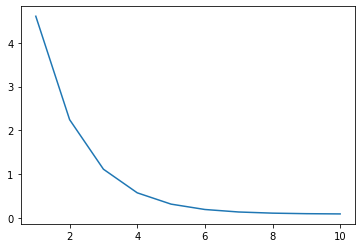

In [23]:
import matplotlib.pyplot as plt

plt.plot(epochs_plot,loss_plot)
plt.show()